In [37]:
from numpy import sinh, sqrt, fmin, tanh, linspace, logspace,array,pi
from scipy.optimize import minimize

In [38]:
def sgw_disp(k):
    '''
    Given k, return omega for sgws
    '''
    omega = sqrt(g*k*tanh(k*H))
    return omega

def fgw_disp(k):
    '''
    Given k, return omega for fgws
    '''
    omega = sqrt((L*k**4 + rho*g)/(rho/tanh(k*H)/k + m))
    return omega

def sgw(omega):
    '''
    Given omega, calculate k for surface gravity waves
    '''
    if isinstance(omega,float):
        output = minimize (lambda x: abs(sgw_disp(x)-omega), omega/sqrt(g*H),
                          method=root_finding_algorithm )
        k = output.x
        good = output.success
        return k, good
    if len(omega)>0:
        k = []
        good = []
        for o in omega:
            output = minimize (lambda x: abs(sgw_disp(x)-o), o/sqrt(g*H),
                          method=root_finding_algorithm)
            k.append( output.x )
            good.append ( output.success )
        return k, good
    
def fgw(omega):
    '''
    Given omega, calculate k for flexural gravity waves
    '''
    if isinstance(omega,float):
        output = minimize (lambda x: abs(fgw_disp(x)-omega), omega/sqrt(g*H),
                          method=root_finding_algorithm)
        k = output.x
        good = output.success
        return k, good
    if len(omega)>0:
        k = []
        good = []
        for o in omega:
            output = minimize (lambda x: abs(fgw_disp(x)-o), o/sqrt(g*H),
                          method=root_finding_algorithm)
            k.append( output.x )
            good.append ( output.success )
        return k, good
    
def transmission_coeff(omega):
    
    k = sgw(omega)[0][0] # ocean  wavenumber
    # print(f'k={k}')
    # print(f'L={2*pi/k} in the water')
    kappa = fgw(omega)[0][0] # ice wavenumber
    # print(f'kappa={kappa}')
    # print(f'L={2*pi/kappa} in the ice')
    
    D = k*sinh(2*k*H) / kappa / sinh(2*kappa*H) * (
        2*kappa*H*(L*kappa**4 + rho*g-m*omega**2)+
        sinh(2*kappa*H)*(5*L*kappa**4 + rho*g - m*omega**2)
                                              )/\
        (rho*g*(2*k*H + sinh(2*k*H)))
    
    R_unscaled = 0.1
    T_unscaled = sqrt( (1 - R_unscaled**2)/D )
    R = R_unscaled / (R_unscaled + T_unscaled)
    T = T_unscaled / (R_unscaled + T_unscaled)
    return T

In [41]:
omega = 2*pi / 35 # this is the independent variable
H = 400
hi = 300
E = 1e10
nu = 0.3
L = E/(1-nu**2) /15 * hi**3
# print(L)

rhoi = 910
m = rhoi*hi
rho = 1024
g = 9.81

print(f'Ocean wavelength: {2*pi / sgw(2*pi/30)[0][0]}')
print(f'Ice Wavelength: {2*pi / fgw(2*pi/30)[0][0]}')

print(f'Ocean wavelength: {2*pi / sgw(2*pi/10)[0][0]}')
print(f'Ice Wavelength: {2*pi / fgw(2*pi/10)[0][0]}')

Ocean wavelength: 1340.5770566470667
Ice Wavelength: 4610.044494747966
Ocean wavelength: 156.13101597009032
Ice Wavelength: 3001.40763138771


In [8]:
root_finding_algorithm = 'TNC'
T=[]
omegs=logspace(-3,1,100)
for omeg in omegs:
    T.append(transmission_coeff(omeg))

/home/bradlipovsky/anaconda3/envs/comcat/lib/python3.7/site-packages/ipykernel_launcher.py:67: RuntimeWarning: overflow encountered in sinh
/home/bradlipovsky/anaconda3/envs/comcat/lib/python3.7/site-packages/ipykernel_launcher.py:68: RuntimeWarning: overflow encountered in sinh
/home/bradlipovsky/anaconda3/envs/comcat/lib/python3.7/site-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in double_scalars


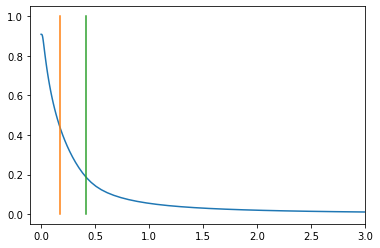

In [46]:
f1 = 2*pi/35
f2 = 2*pi/15

import matplotlib.pyplot as plt
fig,ax=plt.subplots()
fig.patch.set_facecolor('w')
plt.plot(omegs,T)
plt.plot((f1,f1),(1e-3,1e0))
plt.plot((f2,f2),(1e-3,1e0))
plt.xlim([-0.1,3])
plt.show()